In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score
import time
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble, preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from my_functions import *
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC as LSVC
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_csv('Data/covtype.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df[54].value_counts()

2    283301
1    211840
Name: 54, dtype: int64

In [3]:
df = df[df[54] <= 2]
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
12,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576882,2617,29,13,390,128,2081,215,211,130,592,...,0,0,0,0,0,0,0,0,0,2
576883,2614,21,13,379,125,2051,211,212,135,618,...,0,0,0,0,0,0,0,0,0,2
576884,2612,17,13,371,123,2021,208,211,138,644,...,0,0,0,0,0,0,0,0,0,2
576885,2610,16,14,365,110,1991,208,211,138,671,...,0,0,0,0,0,0,0,0,0,2


In [4]:
df = df.reset_index().drop('index', axis = 1)
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
1,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
2,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
3,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
4,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495136,2617,29,13,390,128,2081,215,211,130,592,...,0,0,0,0,0,0,0,0,0,2
495137,2614,21,13,379,125,2051,211,212,135,618,...,0,0,0,0,0,0,0,0,0,2
495138,2612,17,13,371,123,2021,208,211,138,644,...,0,0,0,0,0,0,0,0,0,2
495139,2610,16,14,365,110,1991,208,211,138,671,...,0,0,0,0,0,0,0,0,0,2


In [5]:
df[54].value_counts()

2    283301
1    211840
Name: 54, dtype: int64

In [6]:
X = df.drop(54, axis = 1)
Y = pd.factorize(df[54])[0]

In [13]:
print(X_train.shape)

(50000, 54)

In [12]:
(X_train.shape[0]/5)*4

40000.0

In [12]:
Y_train.shape

(50000,)

In [14]:
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=int64), array([28792, 21208], dtype=int64))

In [128]:
rf = np.empty([9, 7])
mlp = np.empty([9, 7])
svm = np.empty([9, 7])
test_sizes = [0.2,0.5,0.8]
j = 0
start1 = time.time()
for size in test_sizes:
    for i in np.arange(3):
        print(size, i)
        x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=size)
        rf_time = time.time()
        rf_f1, rf_apr, rf_acc, rf_auc = RFfunc(x_train1, x_test1, y_train1, y_test1)
        rf_time = time.time() - rf_time
        
        mlp_time = time.time()
        mlp_f1, mlp_apr, mlp_acc, mlp_auc = MLPfunc(x_train1, x_test1, y_train1, y_test1)
        mlp_time = time.time() - mlp_time
        
        svm_time = time.time()
        svm_f1, svm_apr, svm_acc, svm_auc = LSVMfunc(x_train1, x_test1, y_train1, y_test1)
        svm_time = time.time() - svm_time
        rf[j] = [rf_f1, rf_apr, rf_acc, rf_auc, i, size, rf_time]
        mlp[j] = [mlp_f1, mlp_apr, mlp_acc, mlp_auc, i, size, mlp_time]
        svm[j] = [svm_f1, svm_apr, svm_acc, svm_auc, i, size, svm_time]
        j = j + 1
now1 = time.time()
print('Elapsed Time: ' + str(int(now1-start1)) + ' seconds')

0.2 0
f1_score:
0.9011912191442134
precision_score:
0.9000288819639735
accuracy_score:
0.9028
Confusion Matrix:
[[5152  549]
 [ 423 3876]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5701
           1       0.88      0.90      0.89      4299

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8762978464124818
precision_score:
0.8748448308444031
accuracy_score:
0.8781
Confusion Matrix:
[[4994  707]
 [ 512 3787]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5701
           1       0.84      0.88      0.86      4299

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7658901460024897
precision_score:
0.7665646136492621
accuracy_score:
0.7672
Confusion Matrix:
[[4210 1491]
 [ 837 3462]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      5701
           1       0.70      0.81      0.75      4299

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

0.2 1
f1_score:
0.9013010515731921
precision_score:
0.9000342715812495
accuracy_score:
0.903
Confusion Matrix:
[[5171  552]
 [ 418 3859]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5723
           1       0.87      0.90      0.89      4277

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8753643458016835
precision_score:
0.8739825388613102
accuracy_s

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7717322271755237
precision_score:
0.7721124094906744
accuracy_score:
0.7768
Confusion Matrix:
[[4629 1094]
 [1138 3139]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      5723
           1       0.74      0.73      0.74      4277

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.78      0.78     10000

0.2 2
f1_score:
0.8982335040924778
precision_score:
0.8968781506302878
accuracy_score:
0.9003
Confusion Matrix:
[[5214  564]
 [ 433 3789]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5778
           1       0.87      0.90      0.88      4222

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8724828345300577
precision_score:
0.8735596631110416
accuracy_

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7692585609627991
precision_score:
0.7681895457255643
accuracy_score:
0.772
Confusion Matrix:
[[4405 1373]
 [ 907 3315]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      5778
           1       0.71      0.79      0.74      4222

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

0.5 0
f1_score:
0.8870453404723103
precision_score:
0.8875020107723913
accuracy_score:
0.88972
Confusion Matrix:
[[13045  1333]
 [ 1424  9198]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     14378
           1       0.87      0.87      0.87     10622

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

f1_score:
0.8580122685506582
precision_score:
0.8564952115936223
accur

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7741932762412875
precision_score:
0.7730690747255385
accuracy_score:
0.77804
Confusion Matrix:
[[11357  3021]
 [ 2528  8094]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     14378
           1       0.73      0.76      0.74     10622

    accuracy                           0.78     25000
   macro avg       0.77      0.78      0.77     25000
weighted avg       0.78      0.78      0.78     25000

0.5 1
f1_score:
0.8829193282590573
precision_score:
0.8825860752905663
accuracy_score:
0.8854
Confusion Matrix:
[[12887  1470]
 [ 1395  9248]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     14357
           1       0.86      0.87      0.87     10643

    accuracy                           0.89     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.89      0.89      0.89     25000

f1_score:
0.8565562195850692
precision_score:
0.8554404934598026


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.771149317816419
precision_score:
0.7699257808847871
accuracy_score:
0.77456
Confusion Matrix:
[[11208  3149]
 [ 2487  8156]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     14357
           1       0.72      0.77      0.74     10643

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.78      0.77      0.78     25000

0.5 2
f1_score:
0.8860450048704022
precision_score:
0.8862736765287726
accuracy_score:
0.88856
Confusion Matrix:
[[12964  1369]
 [ 1417  9250]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     14333
           1       0.87      0.87      0.87     10667

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

f1_score:
0.8509229235563065
precision_score:
0.8507152100262619


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7672061123556289
precision_score:
0.7660260477390795
accuracy_score:
0.77024
Confusion Matrix:
[[11055  3278]
 [ 2466  8201]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     14333
           1       0.71      0.77      0.74     10667

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000

0.8 0
f1_score:
0.8460830524657951
precision_score:
0.8452148172772189
accuracy_score:
0.849225
Confusion Matrix:
[[19842  3203]
 [ 2828 14127]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     23045
           1       0.82      0.83      0.82     16955

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000

f1_score:
0.8312805155811258
precision_score:
0.830959354854944

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7676834967154456
precision_score:
0.7671490008374773
accuracy_score:
0.769875
Confusion Matrix:
[[17340  5705]
 [ 3500 13455]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     23045
           1       0.70      0.79      0.75     16955

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.77      0.77     40000

0.8 1
f1_score:
0.8453235629884854
precision_score:
0.8440770961542217
accuracy_score:
0.848175
Confusion Matrix:
[[19679  3340]
 [ 2733 14248]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     23019
           1       0.81      0.84      0.82     16981

    accuracy                           0.85     40000
   macro avg       0.84      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000

f1_score:
0.8305563012521898
precision_score:
0.83001510735043

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7695059488064917
precision_score:
0.7683602948163101
accuracy_score:
0.7723
Confusion Matrix:
[[17648  5371]
 [ 3737 13244]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.79     23019
           1       0.71      0.78      0.74     16981

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.77      0.77     40000

0.8 2
f1_score:
0.847199225686218
precision_score:
0.8460925140016815
accuracy_score:
0.850125
Confusion Matrix:
[[19770  3253]
 [ 2742 14235]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     23023
           1       0.81      0.84      0.83     16977

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000

f1_score:
0.8262136169817684
precision_score:
0.825468823107455
a

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.769135441892917
precision_score:
0.7678659683158744
accuracy_score:
0.77235
Confusion Matrix:
[[17807  5216]
 [ 3890 13087]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     23023
           1       0.72      0.77      0.74     16977

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.78      0.77      0.77     40000

Elapsed Time: 876 seconds


In [136]:
rf_df = pd.DataFrame(rf, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
mlp_df = pd.DataFrame(mlp, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
svm_df = pd.DataFrame(svm, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
rf_df['avg'] = round(rf_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_df['avg'] = round(mlp_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
svm_df['avg'] = round(svm_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_mean = round(mlp_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean = round(rf_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
svm_mean = round(svm_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean['avg'] = round(rf_mean.drop('time',axis=1).mean(axis=1),3).values
mlp_mean['avg'] = round(mlp_mean.drop('time',axis=1).mean(axis=1),3).values
svm_mean['avg'] = round(svm_mean.drop('time',axis=1).mean(axis=1),3).values

rf_mean['avg_std'] = round(rf_df.groupby('test_size').std(),3)['avg'].values
mlp_mean['avg_std'] = round(mlp_df.groupby('test_size').std(),3)['avg'].values
svm_mean['avg_std'] = round(svm_df.groupby('test_size').std(),3)['avg'].values

In [47]:
kf = KFold(n_splits=5, shuffle = True)
rf = np.empty([5, 4])
mlp = np.empty([5, 4])
svm = np.empty([5, 4])
j = 0
for train_index, test_index in kf.split(X_train, Y_train):
    x_train = X_train[train_index]
    y_train = Y_train[train_index]
    
    x_test = X_train[test_index]
    y_test = Y_train[test_index]
        
    start = time.time()
    rf_f1, rf_apr, rf_acc, rf_auc = RFfunc(x_train, x_test, y_train, y_test)
    mlp_f1, mlp_apr, mlp_acc, mlp_auc = MLPfunc(x_train, x_test, y_train, y_test)
    svm_f1, svm_apr, svm_acc, svm_auc = LSVMfunc(x_train, x_test, y_train, y_test)
 
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    rf[j] = [rf_f1, rf_apr, rf_acc, rf_auc]
    mlp[j] = [mlp_f1, mlp_apr, mlp_acc, mlp_auc]
    svm[j] = [svm_f1, svm_apr, svm_acc, svm_auc]
    j = j + 1

f1_score:
0.900985191203893
precision_score:
0.9008482422497388
accuracy_score:
0.9033
Confusion Matrix:
[[5281  489]
 [ 478 3752]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5770
           1       0.88      0.89      0.89      4230

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8765092039553918
precision_score:
0.8763921645702306
accuracy_score:
0.8794
Confusion Matrix:
[[5162  608]
 [ 598 3632]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5770
           1       0.86      0.86      0.86      4230

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Elapsed Time: 120 seconds


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7705814748717709
precision_score:
0.7703179781846514
accuracy_score:
0.7726
Confusion Matrix:
[[4332 1438]
 [ 836 3394]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      5770
           1       0.70      0.80      0.75      4230

    accuracy                           0.77     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Elapsed Time: 88 seconds
Elapsed Time: 215 seconds
f1_score:
0.9013952611420826
precision_score:
0.9001626108074873
accuracy_score:
0.9035
Confusion Matrix:
[[5248  539]
 [ 426 3787]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5787
           1       0.88      0.90      0.89      4213

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8744711664501218


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7639070673478658
precision_score:
0.7630077542112108
accuracy_score:
0.7666
Confusion Matrix:
[[4367 1420]
 [ 914 3299]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      5787
           1       0.70      0.78      0.74      4213

    accuracy                           0.77     10000
   macro avg       0.76      0.77      0.76     10000
weighted avg       0.77      0.77      0.77     10000

Elapsed Time: 73 seconds
Elapsed Time: 204 seconds
f1_score:
0.8992892401899686
precision_score:
0.8992547843680205
accuracy_score:
0.9013
Confusion Matrix:
[[5213  495]
 [ 492 3800]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5708
           1       0.88      0.89      0.89      4292

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8723968083979263


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7670760942295995
precision_score:
0.7661088966639431
accuracy_score:
0.7706
Confusion Matrix:
[[4468 1240]
 [1054 3238]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      5708
           1       0.72      0.75      0.74      4292

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

Elapsed Time: 91 seconds
Elapsed Time: 182 seconds
f1_score:
0.8968003372874984
precision_score:
0.8955126904345654
accuracy_score:
0.8988
Confusion Matrix:
[[5190  570]
 [ 442 3798]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5760
           1       0.87      0.90      0.88      4240

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8689571809277405


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7696087407092999
precision_score:
0.7683217909772877
accuracy_score:
0.7731
Confusion Matrix:
[[4481 1279]
 [ 990 3250]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      5760
           1       0.72      0.77      0.74      4240

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Elapsed Time: 76 seconds
Elapsed Time: 190 seconds
f1_score:
0.9011401916599715
precision_score:
0.9012810397136823
accuracy_score:
0.9035
Confusion Matrix:
[[5290  477]
 [ 488 3745]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5767
           1       0.89      0.88      0.89      4233

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1_score:
0.8696664708144859


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


f1_score:
0.7708135161540624
precision_score:
0.7714487748429484
accuracy_score:
0.7724
Confusion Matrix:
[[4278 1489]
 [ 787 3446]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      5767
           1       0.70      0.81      0.75      4233

    accuracy                           0.77     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Elapsed Time: 99 seconds
Elapsed Time: 202 seconds


C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [71]:
rf_stats = pd.DataFrame(rf, columns = ['f1', 'apr', 'acc', 'auc'])
mlp_stats = pd.DataFrame(mlp, columns = ['f1', 'apr', 'acc', 'auc'])
svm_stats = pd.DataFrame(svm, columns = ['f1', 'apr', 'acc', 'auc'])
rf_stats['avg'] = rf_stats.mean(axis=1).values
mlp_stats['avg'] = mlp_stats.mean(axis=1).values
svm_stats['avg'] = svm_stats.mean(axis=1).values

In [75]:
rf_stats

,f1,apr,acc,auc,avg
0,0.901,0.901,0.903,0.965,0.918
1,0.901,0.900,0.904,0.966,0.918
2,0.899,0.899,0.901,0.964,0.916
3,0.897,0.896,0.899,0.962,0.914
4,0.901,0.901,0.904,0.966,0.918


In [77]:
round(rf_stats.mean(),3)

f1     0.900
apr    0.899
acc    0.902
auc    0.965
avg    0.917
dtype: float64

In [65]:
mlp_stats

,f1,apr,acc,auc,avg
0,0.877,0.876,0.879,0.947,0.89475
1,0.874,0.873,0.877,0.949,0.89325
2,0.872,0.871,0.875,0.943,0.89025
3,0.869,0.868,0.872,0.942,0.88775
4,0.870,0.868,0.872,0.949,0.88975


In [78]:
round(mlp_stats.mean(),3)

f1     0.872
apr    0.871
acc    0.875
auc    0.946
avg    0.891
dtype: float64

In [66]:
svm_stats

,f1,apr,acc,auc,avg
0,0.771,0.770,0.773,0.845,0.78975
1,0.764,0.763,0.767,0.840,0.78350
2,0.767,0.766,0.771,0.837,0.78525
3,0.770,0.768,0.773,0.843,0.78850
4,0.771,0.771,0.772,0.848,0.79050


In [79]:
round(svm_stats.mean(),3)

f1     0.769
apr    0.768
acc    0.771
auc    0.843
avg    0.787
dtype: float64

In [137]:
svm_mean

,f1,apr,acc,auc,time,avg,avg_std
test_size,,,,,,,
0.2,0.769,0.769,0.772,0.845,180.136,0.789,0.003
0.5,0.771,0.770,0.774,0.845,93.520,0.790,0.003
0.8,0.769,0.768,0.771,0.844,13.636,0.788,0.001


In [125]:
svm_mean.mean()

f1         0.768667
apr        0.768000
acc        0.771333
auc        0.843667
avg        0.787667
avg_std    0.003333
dtype: float64

In [132]:
mlp_mean

,f1,apr,acc,auc,time,avg,avg_std
test_size,,,,,,,
0.2,0.874,0.874,0.877,0.949,168.691,28.860,0.001
0.5,0.855,0.854,0.858,0.934,70.042,12.403,0.003
0.8,0.829,0.829,0.833,0.910,31.469,5.953,0.003


In [133]:
rf_mean

,f1,apr,acc,auc,time,avg,avg_std
test_size,,,,,,,
0.2,0.900,0.899,0.902,0.966,6.475,1.843,0.001
0.5,0.885,0.886,0.888,0.955,4.435,1.492,0.002
0.8,0.846,0.845,0.849,0.927,2.394,1.121,0.001


In [140]:
svm_mean.time.values

array([180.136,  93.52 ,  13.636])

In [38]:
def RFfunc(x_train1, x_test1, y_train1, y_test1):
    clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=200, 
                                          random_state=42)
    clf.fit(x_train1, y_train1)
    probs = clf.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.6651,y_test1, probs)
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [39]:
def MLPfunc(x_train1, x_test1, y_train1, y_test1):
    start = time.time()
    mlp = MLPClassifier(solver='adam', activation='relu', alpha=0.001, 
                        hidden_layer_sizes = (32, 32), max_iter = 10000)
    mlp.fit(x_train1, y_train1)
    probs = mlp.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.77, y_test1, probs)
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [40]:
def SVMfunc(x_train1, x_test1, y_train1, y_test1):
    start = time.time()
    svc = SVC(kernel = 'rbf', C = 5, degree = 10, gamma = 0.04, 
              max_iter =  100000, probability = True, n_jobs = -1)
    svc.fit(x_train1, y_train1)
    probs = svc.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.7521,y_test1, probs)
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [41]:
def LSVMfunc(x_train1, x_test1, y_train1, y_test1):
    start=time.time()
    svc = LSVC(C = 3, loss = 'hinge', max_iter=10000)
    svc = CalibratedClassifierCV(svc)
    svc.fit(x_train1,y_train1)
    probs = svc.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.7521,y_test1, probs)
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [ ]:
start = time.time()

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

probs_svm = svc.predict_proba(x_test1)[:,1]
#probs_svm = svc.predict(x_test1)

In [7]:
X_train,Y_train = shuffle(X, Y)
X_train = preprocessing.scale(X_train)
X_train = X_train[0:50000]
Y_train = Y_train[0:50000]
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.2)

In [8]:
start = time.time()
clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=200, random_state=42)
clf.fit(x_train1, y_train1)

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

probs = clf.predict_proba(x_test1)[:,1]

Elapsed Time: 4 seconds


max(tpr - fpr) w/ th =  0.45


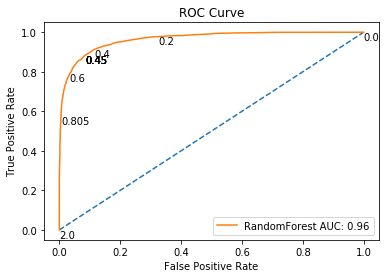

In [9]:
plot_roc(y_test1, probs, 'RandomForest')

In [22]:
matrix_info(0.455,y_test1, probs)

f1_score:
0.849855245405214
precision_score:
0.8487540683517956
accuracy_score:
0.852425
Confusion Matrix:
[[19665  3223]
 [ 2680 14432]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     22888
           1       0.82      0.84      0.83     17112

    accuracy                           0.85     40000
   macro avg       0.85      0.85      0.85     40000
weighted avg       0.85      0.85      0.85     40000



(0.849855245405214, 0.8487540683517956, 0.852425, 0.9304391912856051)

In [10]:
start = time.time()
mlp = MLPClassifier(solver='adam', activation='relu', alpha=0.001, hidden_layer_sizes = (32, 32), max_iter = 10000)
mlp.fit(x_train1, y_train1)

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
probs_nn = mlp.predict_proba(x_test1)[:,1]

Elapsed Time: 17 seconds


max(tpr - fpr) w/ th =  0.4461228714959328


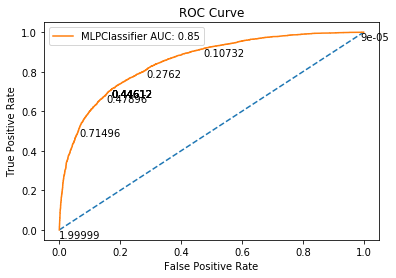

f1_score:
0.7724523399472379
precision_score:
0.7752285593730208
accuracy_score:
0.7787
Confusion Matrix:
[[4722  984]
 [1229 3065]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5706
           1       0.76      0.71      0.73      4294

    accuracy                           0.78     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.78      0.78     10000



(0.7724523399472379, 0.7752285593730208, 0.7787, 0.8533112008686465)

In [11]:
plot_roc(y_test1, probs_nn, 'MLPClassifier')

matrix_info(0.53, y_test1, probs_nn)

In [10]:
svc = LSVC(C = 3, loss = 'hinge', max_iter=10000)
svc = CalibratedClassifierCV(svc)
svc.fit(x_train1,y_train1)
probs = svc.predict_proba(x_test1)[:,1]

C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\taq19\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


max(tpr - fpr) w/ th =  0.4392937121505492


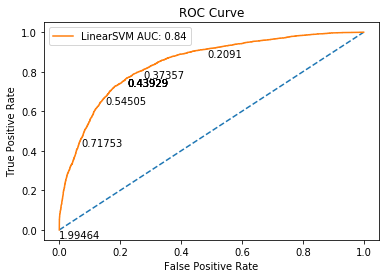

In [11]:
plot_roc(y_test1, probs, 'LinearSVM')

In [32]:
parameters = {'solver': ['adam','lbfgs'], 
              'activation': ['relu'],
              'max_iter': [10000], 
              'alpha': 10.0 ** -np.arange(1, 5), 
              'hidden_layer_sizes':[(10,1),(16,16),(10,10),(64,1),(64,64),(32,32),(32,16)]}
cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv = 5, verbose = 20)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1336s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (3.5927s.) Setting batch_size=1.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:  1.1min
[Paralle

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.1   , 0.01  , 0.001 , 0.0001]),
                         'h

In [33]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32, 32), 'max_iter': 10000, 'solver': 'adam'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,7.990436,1.569940,0.015160,0.010392,relu,0.001,"(32, 32)",10000,adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.769479,0.772617,0.752323,0.750707,0.763232,0.761674,0.008841,1
46,7.058115,2.703894,0.005784,0.000399,relu,0.0001,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.751716,0.760097,0.754747,0.747879,0.785051,0.759897,0.013194,2
4,4.674869,1.525631,0.008380,0.003867,relu,0.1,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.714574,0.758481,0.753939,0.769293,0.763232,0.751899,0.019351,3
40,7.320126,1.681171,0.007979,0.001410,relu,0.001,"(32, 16)",10000,adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.731530,0.750000,0.744242,0.728889,0.785859,0.748101,0.020433,4
50,8.913055,2.750792,0.013364,0.001492,relu,0.0001,"(64, 64)",10000,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.735567,0.765751,0.705455,0.754747,0.766061,0.745516,0.022892,5
24,6.506609,1.948132,0.011171,0.003051,relu,0.01,"(32, 32)",10000,adam,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.713363,0.760501,0.709899,0.766061,0.757576,0.741477,0.024548,6
8,9.704839,2.271285,0.016954,0.003154,relu,0.1,"(64, 64)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.746871,0.682553,0.749899,0.771313,0.720404,0.734206,0.030471,7
18,6.900554,3.510965,0.006383,0.001018,relu,0.01,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.766653,0.598950,0.749899,0.763636,0.764444,0.728712,0.065155,8
2,4.403415,1.289711,0.005984,0.000630,relu,0.1,"(16, 16)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.768268,0.723748,0.616162,0.771717,0.757576,0.727500,0.058188,9
30,5.644494,2.149511,0.006384,0.001492,relu,0.001,"(16, 16)",10000,adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.716996,0.721325,0.715960,0.756768,0.701010,0.722411,0.018494,10


In [15]:
params = {
    'n_estimators': [100, 200],
    'max_features': ['auto'],
    'max_depth' : [None,1,10,50,100]
}

clf = ensemble.RandomForestClassifier(n_jobs = -1, random_state=42)
cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

In [16]:
cv_rf = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_rf.sort_values('rank_test_score')['params'][0])
cv_rf.sort_values('rank_test_score')

best params:  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,26.580557,2.034733,3.465882,1.523289,50,auto,200,"{'max_depth': 50, 'max_features': 'auto', 'n_e...",0.8986,0.9059,0.9025,0.9047,0.9067,0.90368,0.002908,1
1,20.713555,2.050797,1.846000,0.351028,None,auto,200,"{'max_depth': None, 'max_features': 'auto', 'n...",0.8991,0.9057,0.9025,0.9045,0.9065,0.90366,0.002648,2
9,23.108911,0.530579,1.185286,1.016089,100,auto,200,"{'max_depth': 100, 'max_features': 'auto', 'n_...",0.8991,0.9057,0.9025,0.9045,0.9065,0.90366,0.002648,2
0,10.672633,1.363912,3.476981,0.364100,None,auto,100,"{'max_depth': None, 'max_features': 'auto', 'n...",0.8994,0.9052,0.9014,0.9017,0.9060,0.90274,0.002478,4
8,14.453780,2.516284,3.793836,1.623405,100,auto,100,"{'max_depth': 100, 'max_features': 'auto', 'n_...",0.8994,0.9052,0.9014,0.9017,0.9060,0.90274,0.002478,4
6,13.115615,1.537157,3.510704,1.871417,50,auto,100,"{'max_depth': 50, 'max_features': 'auto', 'n_e...",0.8985,0.9050,0.9014,0.9017,0.9052,0.90236,0.002502,6
5,13.241929,1.199059,3.823229,1.331812,10,auto,200,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.8003,0.8073,0.7987,0.7949,0.8042,0.80108,0.004310,7
4,5.722892,0.164345,1.957967,0.442841,10,auto,100,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.8016,0.8087,0.7981,0.7945,0.8018,0.80094,0.004710,8
2,4.532364,1.301699,2.559750,0.752490,1,auto,100,"{'max_depth': 1, 'max_features': 'auto', 'n_es...",0.6168,0.6034,0.5991,0.6061,0.6062,0.60632,0.005840,9
3,4.565582,0.361229,1.975552,0.497620,1,auto,200,"{'max_depth': 1, 'max_features': 'auto', 'n_es...",0.5893,0.5898,0.5876,0.5916,0.5911,0.58988,0.001413,10


In [69]:
params = {
    'C': [1,3,5,10],
    'loss':['hinge'],
    'max_iter': [10000,20000]
}

svc = LSVC(max_iter=10000)
cv = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 3, 5, 10], 'loss': ['hinge'],
                         'max_iter': [10000, 20000]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring='accuracy', verbose=20)

In [70]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 3, 'loss': 'hinge', 'max_iter': 10000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.475669,0.261214,0.000997,6.299989e-04,3,hinge,10000,"{'C': 3, 'loss': 'hinge', 'max_iter': 10000}",0.793207,0.783,0.773,0.770,0.789790,0.7818,0.009079,1
0,0.969010,0.078606,0.000997,3.234067e-07,1,hinge,10000,"{'C': 1, 'loss': 'hinge', 'max_iter': 10000}",0.793207,0.783,0.773,0.770,0.788789,0.7816,0.008910,2
3,2.875406,0.591390,0.000998,1.340243e-06,3,hinge,20000,"{'C': 3, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.783,0.773,0.770,0.787788,0.7814,0.008757,3
1,1.007708,0.088960,0.000799,3.994022e-04,1,hinge,20000,"{'C': 1, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.783,0.773,0.770,0.786787,0.7812,0.008619,4
5,5.028292,0.420864,0.001795,1.163857e-03,5,hinge,20000,"{'C': 5, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.783,0.773,0.770,0.786787,0.7812,0.008619,4
7,7.504991,1.917206,0.001000,1.265192e-06,10,hinge,20000,"{'C': 10, 'loss': 'hinge', 'max_iter': 20000}",0.793207,0.785,0.772,0.769,0.786787,0.7812,0.009202,4
4,5.332012,0.568569,0.001196,3.991615e-04,5,hinge,10000,"{'C': 5, 'loss': 'hinge', 'max_iter': 10000}",0.791209,0.783,0.773,0.769,0.787788,0.7808,0.008511,7
6,9.771397,0.950261,0.001796,3.997331e-04,10,hinge,10000,"{'C': 10, 'loss': 'hinge', 'max_iter': 10000}",0.792208,0.780,0.773,0.771,0.787788,0.7808,0.008204,7


In [39]:
params = {
    'C': [1, 5], 
    'kernel': ['linear', 'rbf'], 
    'degree': [3, 7, 10],
    'gamma': np.power(5, np.linspace(-2,5, 5)),
    'max_iter': [100000]
}

svc = SVC()
cv = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Paralle

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5], 'degree': [3, 7, 10],
                         'gamma': array([4.00000000e-02, 6.68740305e-01, 1.11803399e+01, 1.86918598e+02,
       3.12500000e+03]),
                         'kernel': ['linear', 'rbf'], 'max_iter': [100000]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring='accuracy', verbose=20)

In [34]:
x_train1

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
304001,2867,12,13,212,2,1924,206,212,142,1812,...,1,0,0,0,0,0,0,0,0,0
333606,3097,295,15,175,49,1505,178,235,197,1191,...,0,0,0,0,0,0,0,0,0,0
260019,3039,162,4,134,16,3059,223,240,152,1292,...,0,1,0,0,0,0,0,0,0,0
72966,3041,29,12,376,66,5389,216,213,131,3750,...,0,0,0,0,0,0,0,0,0,0
351036,3210,59,6,0,0,1902,224,228,139,1812,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238314,3068,208,5,90,-12,2190,217,244,164,3705,...,0,0,0,0,0,0,0,0,0,0
336087,2932,222,12,663,96,2627,205,251,181,1716,...,0,0,0,0,0,0,0,0,0,0
461295,3250,308,3,67,11,693,212,237,164,1262,...,0,0,0,0,0,0,0,0,1,0
269104,3175,108,19,277,68,752,249,214,86,666,...,0,0,1,0,0,0,0,0,0,0


In [40]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 5, 'degree': 10, 'gamma': 0.04, 'kernel': 'rbf', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,2.353872,0.139754,0.384772,0.029790,5,10,0.04,rbf,100000,"{'C': 5, 'degree': 10, 'gamma': 0.04, 'kernel'...",0.809191,0.802198,0.801,0.789790,0.813814,0.8032,0.008173,1
31,2.568265,0.166693,0.366639,0.020163,5,3,0.04,rbf,100000,"{'C': 5, 'degree': 3, 'gamma': 0.04, 'kernel':...",0.809191,0.802198,0.801,0.789790,0.813814,0.8032,0.008173,1
41,2.853188,0.191577,0.471340,0.056109,5,7,0.04,rbf,100000,"{'C': 5, 'degree': 7, 'gamma': 0.04, 'kernel':...",0.809191,0.802198,0.801,0.789790,0.813814,0.8032,0.008173,1
3,4.380591,0.248239,0.649270,0.065163,1,3,0.66874,rbf,100000,"{'C': 1, 'degree': 3, 'gamma': 0.6687403049764...",0.808192,0.798202,0.786,0.784785,0.801802,0.7958,0.009085,4
23,4.110350,0.194912,0.670208,0.050363,1,10,0.66874,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.668740304976...",0.808192,0.798202,0.786,0.784785,0.801802,0.7958,0.009085,4
13,4.134265,0.188002,0.668224,0.025363,1,7,0.66874,rbf,100000,"{'C': 1, 'degree': 7, 'gamma': 0.6687403049764...",0.808192,0.798202,0.786,0.784785,0.801802,0.7958,0.009085,4
1,2.285059,0.356587,0.320534,0.085731,1,3,0.04,rbf,100000,"{'C': 1, 'degree': 3, 'gamma': 0.04, 'kernel':...",0.798202,0.790210,0.790,0.797798,0.794795,0.7942,0.003547,7
21,2.551552,0.226214,0.402159,0.017890,1,10,0.04,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.04, 'kernel'...",0.798202,0.790210,0.790,0.797798,0.794795,0.7942,0.003547,7
11,2.557165,0.271641,0.416488,0.028675,1,7,0.04,rbf,100000,"{'C': 1, 'degree': 7, 'gamma': 0.04, 'kernel':...",0.798202,0.790210,0.790,0.797798,0.794795,0.7942,0.003547,7
33,4.357085,0.254296,0.558053,0.018864,5,3,0.66874,rbf,100000,"{'C': 5, 'degree': 3, 'gamma': 0.6687403049764...",0.808192,0.777223,0.787,0.781782,0.800801,0.7910,0.011685,10


In [32]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 1, 'degree': 10, 'gamma': 3125.0, 'kernel': 'rbf', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,5.798716,0.341561,1.273867,0.061789,1,10,3125,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 3125.0, 'kerne...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
31,5.870519,0.380944,1.263730,0.064457,1,10,0.04,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.04, 'kernel'...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
33,5.848913,0.398054,1.273519,0.080736,1,10,0.66874,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 0.668740304976...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
35,6.105049,0.352619,1.273745,0.073564,1,10,11.1803,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 11.18033988749...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
37,6.032891,0.352681,1.293661,0.073773,1,10,186.919,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 186.9185976526...",0.578,0.578,0.578,0.578,0.578,0.5780,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,8.256499,0.474628,0.109705,0.012694,1,3,186.919,linear,100000,"{'C': 1, 'degree': 3, 'gamma': 186.91859765265...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61
18,10.086388,0.197747,0.170566,0.034574,1,3,3125,linear,100000,"{'C': 1, 'degree': 3, 'gamma': 3125.0, 'kernel...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61
36,7.598050,0.267677,0.102326,0.008662,1,10,186.919,linear,100000,"{'C': 1, 'degree': 10, 'gamma': 186.9185976526...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61
8,8.198848,0.379884,0.102765,0.009486,1,2,3125,linear,100000,"{'C': 1, 'degree': 2, 'gamma': 3125.0, 'kernel...",0.528,0.598,0.543,0.495,0.490,0.5308,0.039035,61


In [20]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 5, 'degree': 10, 'gamma': 3125.0, 'kernel': 'linear', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
159,5.987801,0.221501,0.068331,0.009900,5,10,3125,linear,100000,"{'C': 5, 'degree': 10, 'gamma': 3125.0, 'kerne...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
136,7.997192,0.408793,0.106914,0.023461,5,3,73.1004,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 73.100443455321...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
135,8.001259,0.302747,0.099534,0.008952,5,3,20.9063,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 20.906275773759...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
134,8.874059,0.521921,0.101927,0.006688,5,3,5.97907,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 5.9790658725020...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
133,9.529589,0.282009,0.118613,0.011472,5,3,1.70998,linear,100000,"{'C': 5, 'degree': 3, 'gamma': 1.7099759466766...",0.53047,0.464,0.614,0.564,0.661662,0.5668,0.067992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,8.095172,0.437890,0.121276,0.014693,0.1,7,5.97907,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 5.97906587250...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
23,8.226855,0.397989,0.130860,0.012974,0.1,7,1.70998,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 1.70997594667...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
22,9.454508,0.903808,0.123868,0.012350,0.1,7,0.489043,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 0.48904256961...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
20,8.144085,0.610632,0.123669,0.007490,0.1,7,0.04,linear,100000,"{'C': 0.1, 'degree': 7, 'gamma': 0.04, 'kernel...",0.48951,0.488,0.526,0.483,0.530531,0.5034,0.020457,121
